This is based on the simulations done in 
# Factors Influencing the Detectability of Early Warning Signals of Population Collapse

This is a simulation of a onlinear equation with multiplicative noise using a Heun method where the noise only applies on the variable and not the parameter. 

\begin{equation}
\dot{x}=[rx(1-x/K)-\lambda\frac{x^2}{x^2+h^2}]dt+\sigma x dW
\end{equation}

where $x$ is a random variable and $\lambda$ is a swiped parameter determined by $\dot{\lambda}=c_\lambda$. Here $c_\lambda=[0.025,0.03,...,0.07]$
r=1, k=100, h=1, c_0=1


In [1]:
import os 
cwd = os.getcwd()
import sys
#sys.path.append("C:/Users/928814/Documents/global_python_codes/Metrics_thresholds_boots") # go to parent dir
import sympy as sp
import numpy as np
import sdeint
#import metrics
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker

plt.rcParams.update({'font.size': 18})

In [2]:
xs, rs, ks, hs, cs, a, ls = sp.symbols('x r k h c a lambda')
eq=rs*xs*(1-xs/ks)-ls*(xs**2)/(xs**2+hs**2)
eq2=eq.subs(hs, 1)
eq2=eq2.subs(rs, 1)
eq3=1*(1-xs/100)-ls*(xs)/(xs**2+1**2)
sp.solve(eq3, xs)

[-(9997 - 300*lambda)/(3*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3,
 -(9997 - 300*lambda)/(3*(-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(45000*lambda + sqrt(-4*(9997 - 300*lambda)**3 + (90000*lambda - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3]

In [3]:
Mx=sp.diff(eq,xs)
Mx=sp.diff(eq3,xs)
Mx

2*lambda*x**2/(x**2 + 1)**2 - lambda/(x**2 + 1) - 1/100

In [4]:
M0=Mx.subs(xs, 0)
M0

-lambda - 1/100

In [5]:
sp_xu=-(9997 - 300*ls)/(3*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

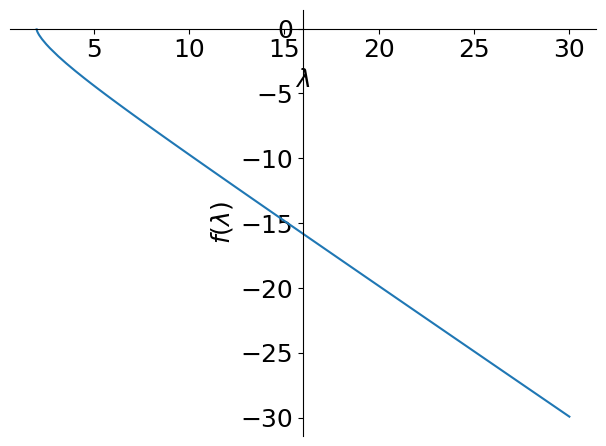

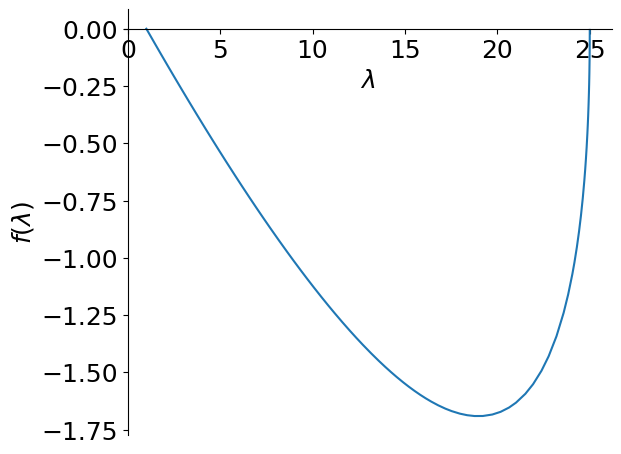

In [6]:
mr=Mx.subs(xs,sp_xu)
p1=sp.plotting.plot(mr, (ls, 1, 30))
p1=sp.plotting.plot(1/mr, (ls, 2.2, 35))

sp_xu2=-(9997 - 300*ls)/(3*(-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + sp.sqrt(3)*1j/2)*(45000*ls + sp.sqrt(-4*(9997 - 300*ls)**3 + (90000*ls - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3
mr2=Mx.subs(xs,sp_xu2)
p1=sp.plotting.plot(mr2, (ls, 1, 26))

p1=sp.plotting.plot(mr2*(ls-1)/0.07, (ls, 1, 26))


In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from matplotlib import cm
cmap =cm.get_cmap('turbo')


C:\Users\jp928814\AppData\Local\Temp\ipykernel_11132\1611679012.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap('turbo')


In [8]:
def s1(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s2(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 - np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3


def s3(lv):
    lv=lv+0*lv*1j
    return -(9997 - 300*lv)/(3*(-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)) - (-1/2 + np.emath.sqrt(3)*1j/2)*(45000*lv + np.emath.sqrt(-4*(9997 - 300*lv)**3 + (90000*lv - 2001800)**2)/2 - 1000900)**(1/3)/3 + 100/3

lvar=np.linspace(0,28,6900)



## Test using a single initial condition some distance from the critical value

0
20
40
60
80
100
120
140
160
180


C:\Users\jp928814\AppData\Local\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\jp928814\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NameError: name 'x' is not defined

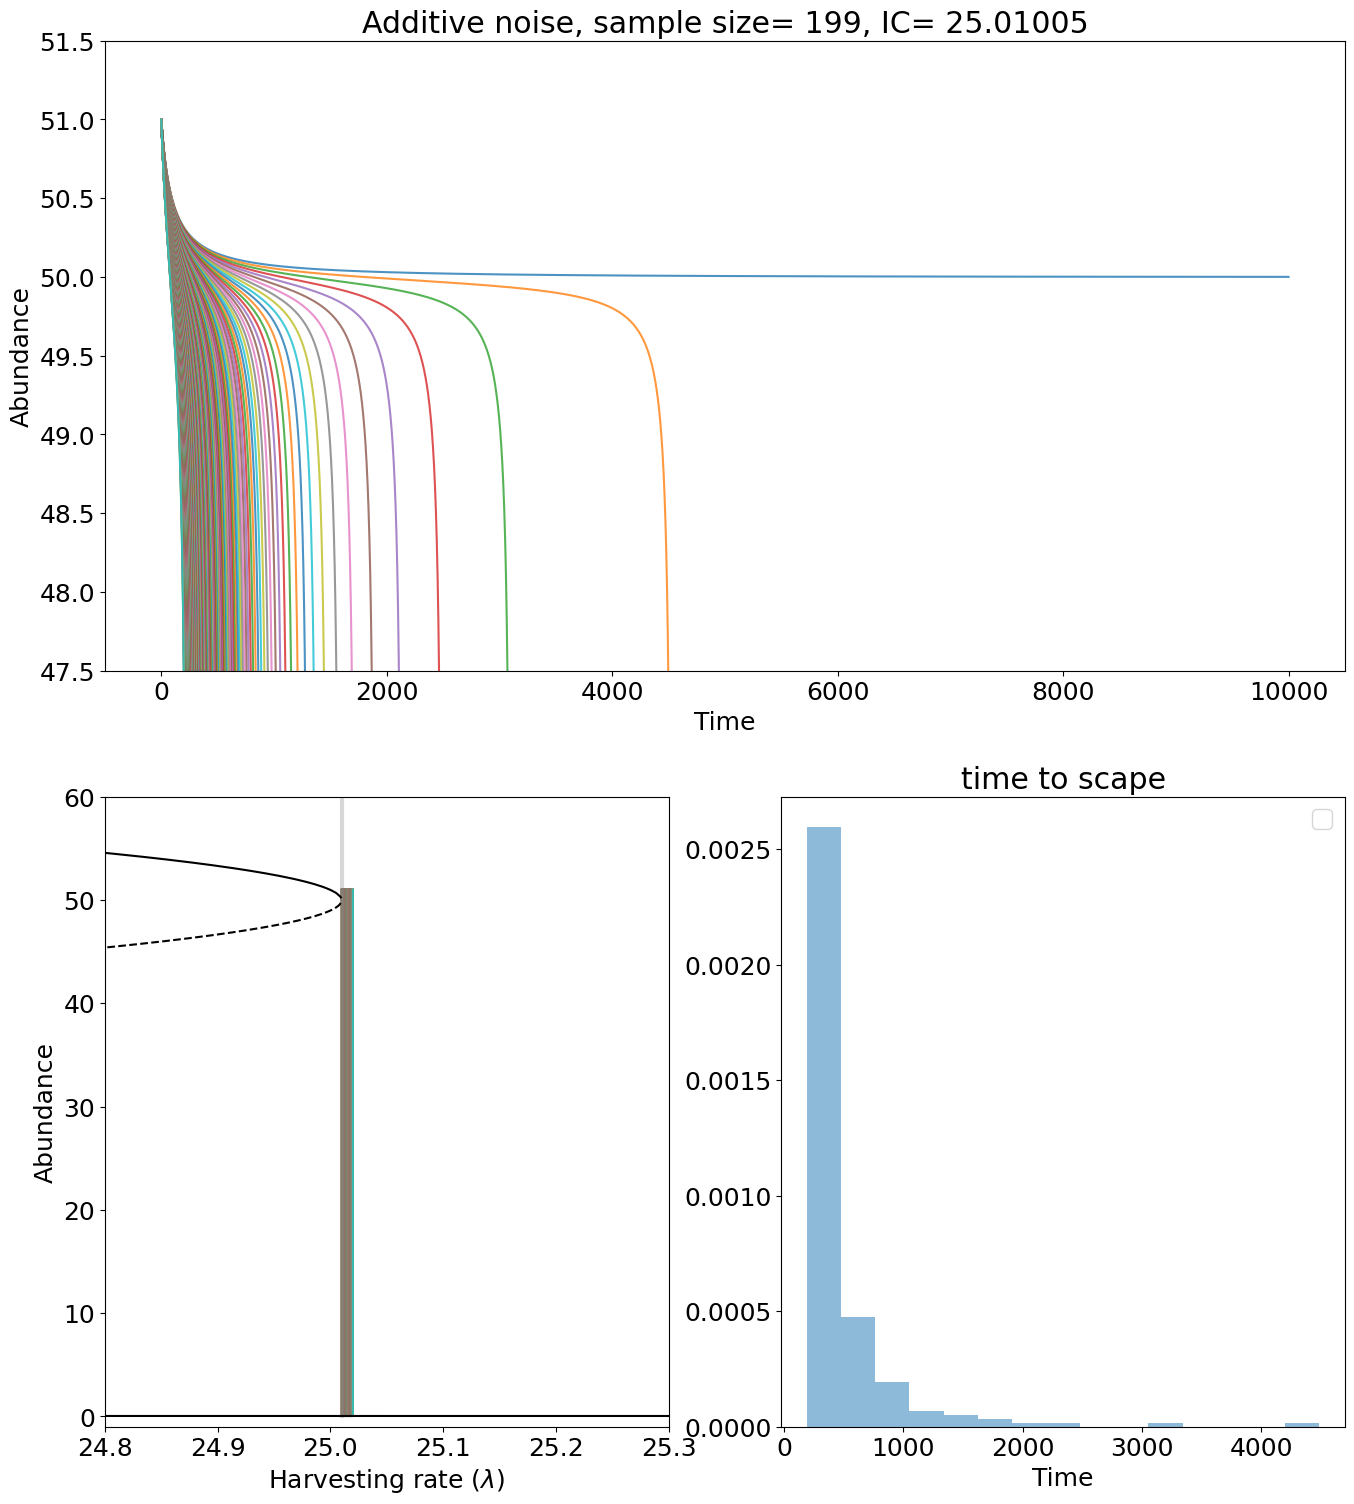

In [9]:

crit=1

k=100
r=1
h=1 
cases=500
t_final=10000

li=25.01+0.00005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

deltas=np.arange(25.01,25.02,0.00005)


t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

x0= 51#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(16, 18))
ax=fig.add_subplot(223)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(224)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B


for j in range(len(deltas)):
    l0=deltas[j]
    res_det=odeint(f, x0, tspan)


    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    cl=0
    l1=l0+cl*tspan
    #dl=cl*tspan[1]-l0


    try:
        index = np.argwhere(res_det < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
        
    #N[j,:]=res.reshape(len(tspan), )
    ax.plot(l1,res_det,alpha=0.8)
    ax2.plot(tspan,res_det,alpha=0.8)
    if j%20==0: print(j)
    # ax.plot(tspan,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8)

ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('')


#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([47.5,51.5])

data=t_scape[t_scape>1]

ax2.set_title('Additive noise, sample size= %.i, IC= %.5f' %(len(data),li))

ax3.set_ylabel('')
ax3.set_xlabel('Time')
ax3.set_title('time to scape')

plt.legend()
try:
    index = np.argwhere(res_det < threshold)[0][0]
except:
    index=0
    
from scipy.optimize import curve_fit
n, bins, patches = ax3.hist(data, bins=15, density=True,alpha=0.5)
        
def exp_func(x, a, b, c):
    return a * np.exp(-b * (x-c))
bin_centers = (bins[:-1] + bins[1:]) / 2
popt, pcov = curve_fit(exp_func, bin_centers, n)
xfit = np.linspace(0, np.max(data), 100)
yfit = exp_func(x, *popt)
#ax3.plot(xfit, yfit, 'r-', label='fit: a=%.3f, b=%.3f, c=%.3f' % tuple(popt))
ax2.axhline(y=threshold, color='k',lw=3,linestyle='--',label='threshold')

Text(0.5, 1.0, 'derivative')

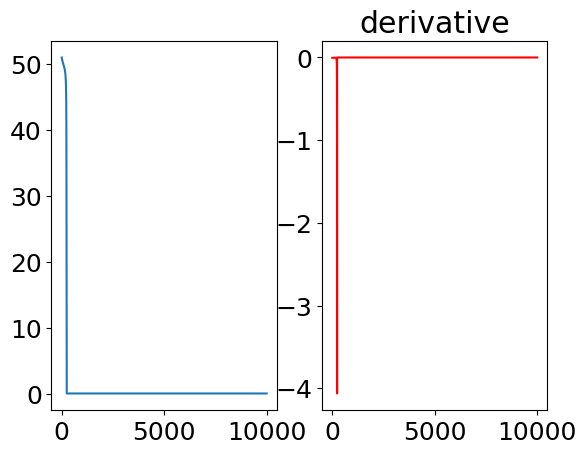

In [10]:
fig=plt.figure()
ax=fig.add_subplot(121)
plt.plot(tspan,res_det)
ax2=fig.add_subplot(122)
drdt = np.gradient(np.squeeze(res_det))
ax2.plot(tspan, drdt, 'r-', label='dy/dx')
ax2.set_title('derivative')

In [11]:
np.shape(np.squeeze(res_det[0:]))


(44445,)

C:\Users\jp928814\AppData\Local\Temp\ipykernel_11132\3526703213.py:44: RuntimeWarning: overflow encountered in double_scalars
  A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
C:\Users\jp928814\AppData\Local\Temp\ipykernel_11132\3526703213.py:44: RuntimeWarning: invalid value encountered in double_scalars
  A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)


0


KeyboardInterrupt: 

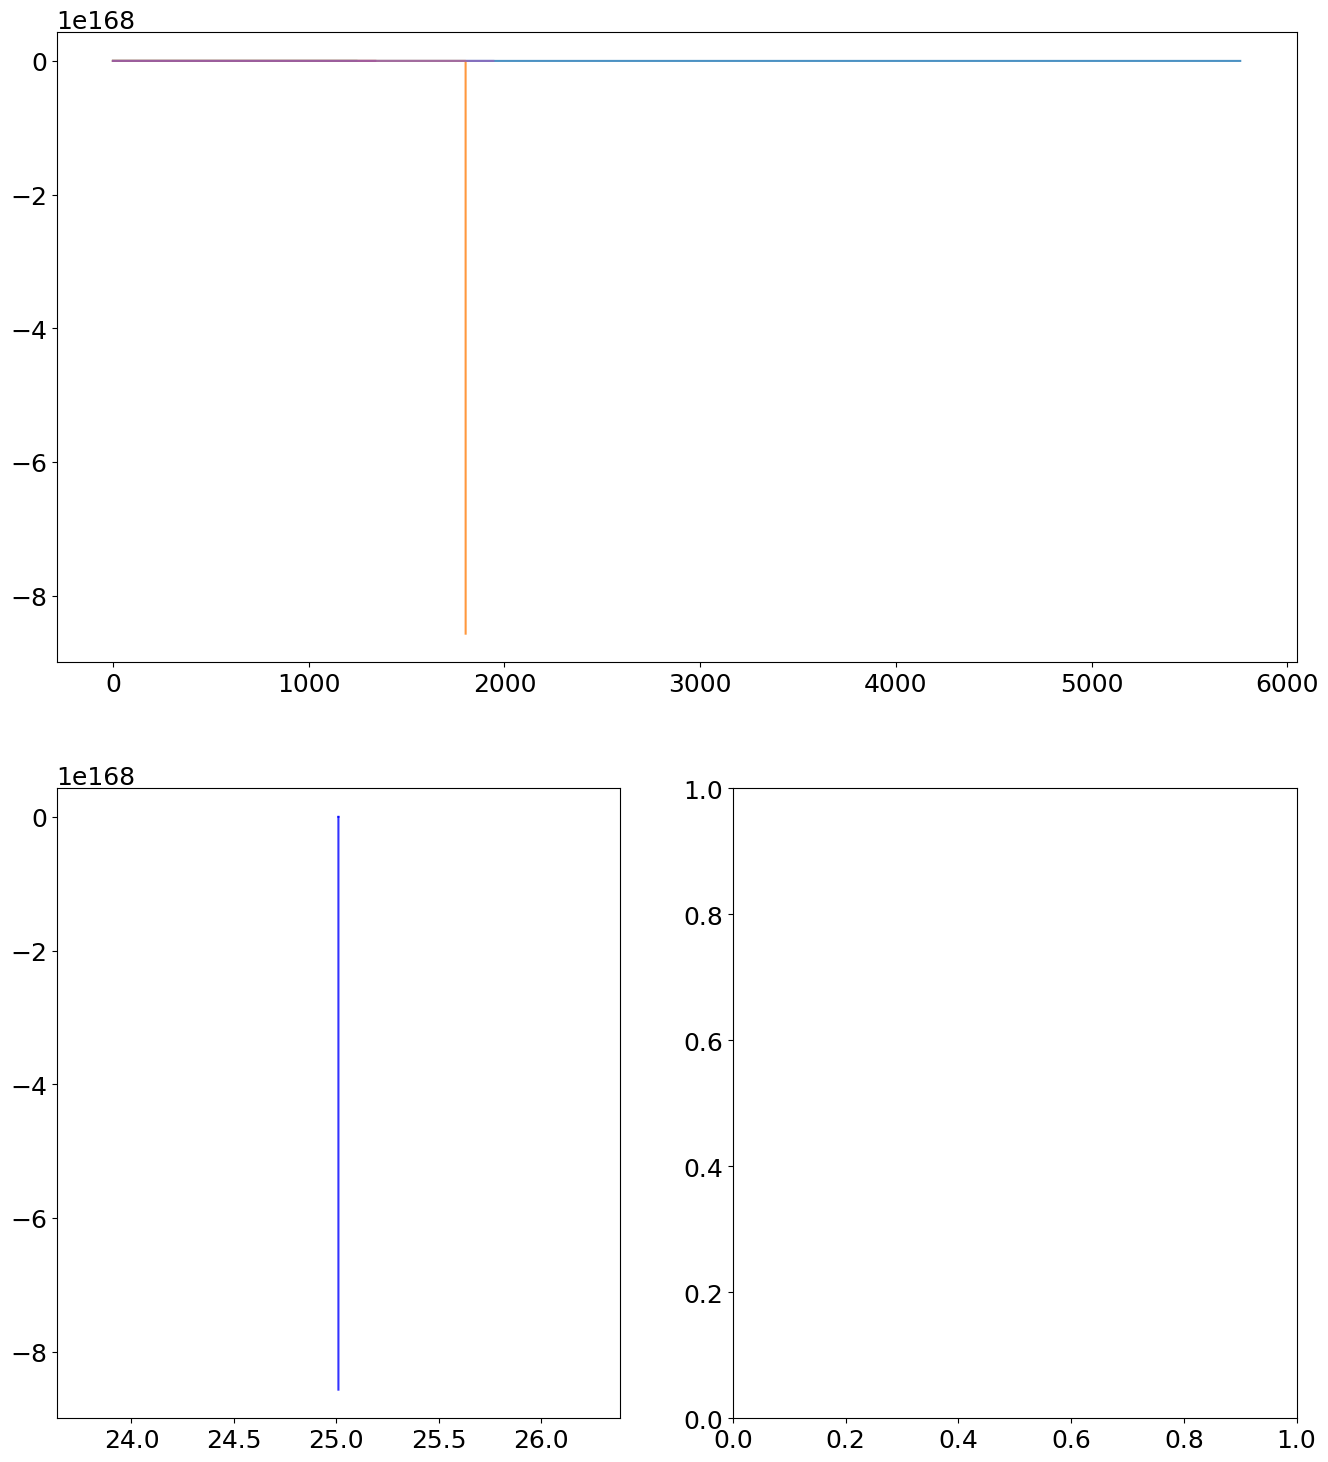

In [12]:

crit=1

k=100
r=1
h=1 
cases=500
t_final=10000

li=25+0.01005
s=0.0008
l0=li
lf=28
# cl=np.sign(lf-l0)*cls[j]

t_rm=np.abs(0.9)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

x0= 51#50  
    
#N=np.zeros((cases,len(tspan)))


t_scape=np.zeros((cases))
threshold=48
    

fig=plt.figure(figsize=(16,18))
ax=fig.add_subplot(223)
ax2=fig.add_subplot(211)
ax3=fig.add_subplot(224)
lvar=np.linspace(26,24,20000)


def f(x, t):
    l=l0
    A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
    return A

def g(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    B = s*x0/4 # diagonal, so independent driving Wiener processes
    #the only parameter with relevant aditive noise is X(t) in this case. 
    return B

res_det=odeint(f, x0, tspan)
np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
cl=0
l1=l0+cl*tspan

def integ(x0,tspan,t_scape,j):
    res = sdeint.stratHeun(f, g, x0, tspan)
    try:
        index = np.argwhere(res < threshold)[0][0]
        t_scape[j]=tspan[index]
    except:
        t_scape[j]=0
    ax.plot(l1,res,color='blue',alpha=0.8)
    ax2.plot(tspan,res,alpha=0.8)
    if j%20==0: print(j)
    return 

[integ(x0,tspan,t_scape,j) for j in range(cases) ]
   

ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.3)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax2.set_title('Additive noise, sample size= %.i, IC= %.5f' %(len(data),li))
ax.set_title('')


#cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
#norm = BoundaryNorm(np.sort(cls), cmap.N)
#cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
#cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([0,60])
ax.set_xlim([24.8,25.3])

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
ax2.set_ylim([48,51.5])
ax2.plot(tspan,res_det,'-k',lw=3,label='Deterministic')

data=t_scape[t_scape>1]
ax3.hist(data,bins=15, density=True, alpha=0.5, label='Data')

ax3.set_ylabel('')
ax3.set_xlabel('Time')
ax3.set_title('time to scape')

plt.legend()
try:
    index = np.argwhere(res_det < threshold)[0][0]
except:
    index=0
        
ax3.axvline(x=tspan[index], color='k',lw=3,label='Deterministic')

In [ ]:
from scipy.stats import poisson
from scipy.stats import rayleigh
from scipy.optimize import curve_fit

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.hist(t_scape[t_scape>1])  
data=t_scape[t_scape>1]

datar=data
#ax.hist(datar, bins=15, density=True, alpha=0.5, label='Data')
#param, cov = curve_fit(poisson_func,np.linspace(0, np.max(data),10), np.histogram(data, bins=10)[0])
#ax.plot(np.linspace(0, np.linspace(0, np.max(data),10),10), poisson_func(np.linspace(0, np.max(data),10), *param), 'r-', lw=2, label='Poisson fit')


hist, bins = np.histogram(datar, bins='auto', density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

params = rayleigh.fit(datar)
pdf_fitted = rayleigh.pdf(bin_centers, *params)
scale = params[0]

# Define the Poisson PDF
def poisson_pdf(k, lamb):
    return (lamb**k / np.math.factorial(k)) * np.exp(-lamb)

# Fit the Poisson distribution to the data
#param, _ = curve_fit(poisson_pdf, bin_centers.astype(float), hist)

# Compute the PMF of the fitted Poisson distribution
#pmf_fitted = poisson_pdf(bin_centers, *param)



#x = np.linspace(0, np.max(tspan), 1000)
pdf = rayleigh.pdf(x, loc=0, scale=scale)

# Plot the PDF
#ax.plot(x, pdf, 'r-', label='Rayleigh PDF')
plt.hist(datar, bins='auto', density=True, alpha=0.5, label='Data')
plt.plot(bin_centers, pdf_fitted, 'r-', lw=2, label='Rayleigh fit')
#plt.plot(bin_centers, pmf_fitted, 'r-', lw=2, label='Poisson fit')
plt.legend()
ax.set_title('time to scape')
ax.set_xlabel('Time [s]')

np.min(datar)
# Plot the histogram of the data with the fitted Poisson distribution
#plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
#plt.legend()
#plt.show()
params

# swiping the parameter

C:\Users\jp928814\AppData\Local\Temp\ipykernel_11132\1649144133.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0$','$t_f/2-\delta/c_\lambda$','','$t_f/2+\delta/c_\lambda$','$t_f$'])
C:\Users\jp928814\AppData\Local\Temp\ipykernel_11132\1649144133.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$0$','$\lambda_{crit}$','$\lambda_{crit}+\delta$'])


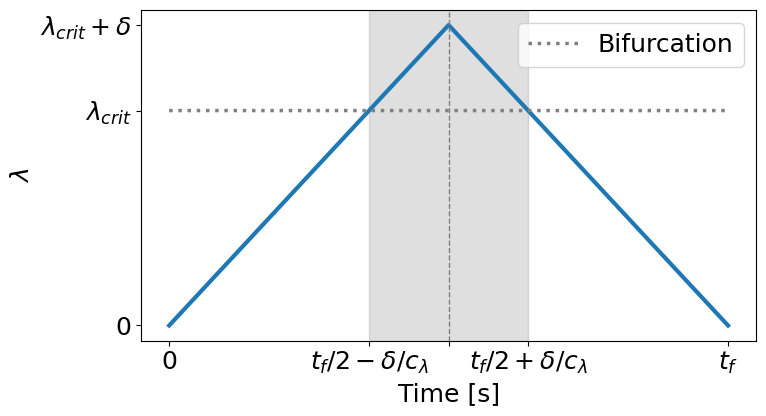

In [36]:
li=23
l0=li
delta=0.8
lcrit=25.01+delta
lf=lcrit

cl=np.sign(lf-l0)*0.01

t_final=2*(lf-l0)/cl
t_rm=np.abs(0.1)
t_threshold=t_rm/2
dt=t_threshold/4

datalen=t_final/300
if datalen>=t_threshold/2: 
    datalen=t_threshold/2

t_win=t_rm/datalen ### length of correlation. 
tspan=np.arange(0,t_final,datalen)

l=-cl*np.abs(tspan-t_final/2)+lcrit

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig=plt.figure(figsize=(9, 5))
ax=fig.add_subplot(111)
plt.plot(tspan,l,lw=3)
plt.axvline(x=t_final/2,linestyle='--',lw=1,color='grey')
plt.plot(tspan,tspan*0+25.01,':',lw=2.5,color='grey',label='Bifurcation')
xticks = [0,t_final/2-delta/np.abs(cl),t_final/2,t_final/2+delta/np.abs(cl),t_final]
ax.set_xticklabels(['$0$','$t_f/2-\delta/c_\lambda$','','$t_f/2+\delta/c_\lambda$','$t_f$'])
ax.set_xticks(xticks)

yticks = [l0,25.01,25.01+delta]
ax.set_yticklabels(['$0$','$\lambda_{crit}$','$\lambda_{crit}+\delta$'])
lmax=lf
ax.axvspan(t_final/2-delta/np.abs(cl),t_final/2+delta/np.abs(cl), alpha=0.25, color='gray')

ax.set_yticks(yticks)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$\lambda$')
plt.tight_layout()
fig.savefig('protocol_scheme.png', dpi=200)

In [ ]:

k=100
r=1
h=1 
cls=np.arange(0.0001,0.04,0.0003)

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)

fig=plt.figure(figsize=(16, 9))
ax=fig.add_subplot(111)
for j in range(len(cls)):
    li=15
    s=0.08
    l0=li
    lcrit=25.01+0.3
    lf=lcrit
    cl=np.sign(lf-l0)*cls[j]

    t_final=2*(lf-l0)/cl
    t_rm=np.abs(0.4)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 95

    def f(x, t):
        l=-cl*np.abs(t-t_final/2)+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l1=-cl*np.abs(tspan-t_final/2)+lcrit
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    res_det=odeint(f, x0, tspan)
    ax.plot(l1,res_det,color=cmap(np.int64(255*pnorm[j])),alpha=0.8,lw=2)

lvar=np.linspace(26,21,19000)
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Deterministic')


cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
cbar.ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,80])
ax.set_xlim([22,lf+0.5])
fig.savefig('Deterministic_linear_protocol.png', dpi=200)

In [ ]:

k=100
r=1
h=1 
cls=np.arange(0.0001,0.04,0.0003)

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)

fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(111)


li=15
s=0.08
l0=li
lcrit=25.01+0.3
lf=lcrit    
x0= 95
    
    
for j in range(len(cls)):
    
    cl=np.sign(lf-l0)*cls[j]
    t_final=2*(lf-l0)/cl
    t_rm=np.abs(0.5)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)


    def f(x, t):
        l=-cl*np.abs(t-t_final/2)+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l1=-cl*np.abs(tspan-t_final/2)+lcrit
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    result = sdeint.stratHeun(f, g, x0, tspan)
    res=result

    ax.plot(l1,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8,lw=2)

lvar=np.linspace(26,20,15000)
ax.plot([25.01,25.01],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Additive noise')


cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)
cbar.ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,80])
ax.set_xlim([22,lf+0.5])

In [ ]:

k=100
r=1
h=1 
cls=np.arange(0.0001,0.04,0.0003)

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)

li=15
s=0.08*10
l0=li
lcrit=25.01+0.3
lf=lcrit
x0= 95

fig=plt.figure(figsize=(16, 9))
ax=fig.add_subplot(111)
for j in range(len(cls)):
   
    cl=np.sign(lf-l0)*cls[j]

    t_final=2*(lf-l0)/cl
    t_rm=np.abs(0.5)
    t_threshold=t_rm/2
    dt=t_threshold/2

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)


    def f(x, t):
        l=-cl*np.abs(t-t_final/2)+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l1=-cl*np.abs(tspan-t_final/2)+lcrit
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    res = sdeint.stratHeun(f, g, x0, tspan)
 

    ax.plot(l1,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8,lw=2)

lvar=np.linspace(26,20,15000)
ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Additive noise')

cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)
cbar.ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([-1,80])
ax.set_xlim([22,lf+0.5])

In [ ]:
from joblib import Parallel, delayed

k=100
r=1
h=1 
cls=np.arange(0.0005,0.035,0.001)

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)
cases=300
threshold=30
t_scape=np.zeros((len(cls),cases))
tfs=np.zeros((len(cls)))

deltas=0.3

li=19
l0=li
s=1.2
#fig=plt.figure(figsize=(12, 2/3*9))
#ax=fig.add_subplot(111)
for j in range(len(cls)):

    lcrit=25.01+deltas
    lf=lcrit
    cl=np.sign(lf-l0)*cls[j]

    t_final=2*(lf-l0)/cl
    
    tfs[j]=t_final
    t_rm=np.abs(0.8)
    t_threshold=t_rm/2
    dt=t_threshold/2

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 75

    def f(x, t):
        l=-cl*np.abs(t-t_final/2)+lcrit
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B

    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l1=-cl*np.abs(tspan-t_final/2)+lcrit
    dl=cl*tspan[1]-l0
    
    def process_data(i):
        res = sdeint.stratHeun(f, g, x0, tspan)  # integration
        try:
            index = np.argwhere(res < threshold)[0][0]
            return tspan[index]
        except:
            return 0
        
    num_jobs = -1  # Use all available CPU cores, adjust as needed
    t_scape_temp = Parallel(n_jobs=num_jobs)(delayed(process_data)(i) for i in range(cases))
    t_scape[j,:] = np.array(t_scape_temp)
        
  #  if len(cls[0:j])%10==0: print(100*len(cls[0:j])/len(cls))
    #ax.plot(l1,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8,lw=2)

#lvar=np.linspace(26,20,15000)
#ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.5)


In [ ]:
%matplotlib notebook
import matplotlib.ticker as ticker

def tscape_to_lscape(t_scape,tfs,deltas,l0,cases):
    lmax=25.01+deltas
    tscp_norm=np.zeros_like(t_scape)
    lscape=np.zeros_like(t_scape)
    for c in range(cases):
        tscp_norm[:,c]=t_scape[:,c]/tfs
    # print(tscp_norm)
    lmax=25.01+deltas
    lscape[:,:]=tscp_norm[:,:]*(2*(lmax-l0))+l0
    return lscape

lscape=tscape_to_lscape(t_scape,tfs,deltas,l0,cases)

lmax=25.01+deltas
l_t=25.01

fig=plt.figure(figsize=(14, 15))
ax=fig.add_subplot(111)
for j in range(len(cls)):
    tipped=lscape[j,:][lscape[j,:]>l0]
    hist, bins = np.histogram(tipped, bins='auto', density=True)
#    plt.hist(t_scape[j]/np.max(hist),bins='auto', density=True, alpha=0.5, label='Data')
    bin_centers = (bins[:-1] + bins[1:]) / 2
    ax.bar( bin_centers, 2*hist/np.max(hist), bottom=np.zeros_like(hist) + j*3, width=np.diff(bins),fc=cmap(np.int64(255*pnorm[j])), ec=cmap(np.int64(255*pnorm[j])), align="center")
    ax.annotate('%.1f' %(100*len(tipped)/cases)+'%', (bin_centers[-1]+np.diff(bins)[0]/2+0.07, j*3), xytext=None,
                xycoords='data', textcoords=None, fontsize=10, arrowprops=None, annotation_clip=None)
ax.set_title('$\delta:$ %.3f \n Noise: %.2f, Ensemble size: %i' %(deltas,s,cases))
ax.set_xlabel('$\lambda$')
ax.set_ylim([0,(len(cls))*3])
ax.set_xlim([24,27.5])
# Set the custom ticks on the x-axis
ax.axvline(x=lmax, color='gray',linestyle='--',lw=1,label=r'$\lambda_{crit}+\delta$')
ax.axvspan(lmax-(lmax-l_t),lmax+lmax-l_t, alpha=0.3, color='gray',label='outside bifurcation',zorder=-1)
plt.legend()
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
for label in xticklabels:
    x,  value = label.get_position(), label.get_text()
    if float(value) > 25.01:
        new_value = '{:.2f}'.format(25.01-(float(value) - 25.01))
        label.set_text(new_value)
ax.set_xticklabels(xticklabels)
yticks = ax.get_yticks()
yticklabels = ax.get_yticklabels()
for label in yticklabels:
    y,  value = label.get_position(), label.get_text()
    new_value = '{:.3f}'.format(float(value)/(3*len(cls))*(cls[-1]-cls[0])+cls[0])
    label.set_text(new_value)
ax.set_yticklabels(yticklabels)
ax.set_yticklabels([])

cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
cbar.ax.yaxis.set_major_formatter(formatter)
fig.savefig('hist_fixed_delta.png', dpi=200)

means=np.zeros_like(cls)
meansl=np.zeros_like(cls)

counts=np.zeros_like(cls)
varss=np.zeros_like(cls)

for j in range(len(cls)):
    tipped=lscape[j,:][lscape[j,:]>l0]
    means[j]=np.mean(t_scape[j][t_scape[j]>0])/tfs[j]
    meansl[j]=np.mean(tipped)
    counts[j]=len(t_scape[j][t_scape[j]>0])
    varss[j]=np.var(tipped)

fig=plt.figure(figsize=(8, 13))
ax=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
 
#ax.plot(cls,means,'o')
#ax.set_ylabel('mean/integration time')

ax.plot(cls,meansl,'o')
ax.set_ylabel('mean tipping $\lambda$')
ax.axhline(y=25.01, color='gray',linestyle='-',lw=1,label=r'$\lambda_{cr}$')
ax.legend()
ax2.plot(cls,100*counts/cases,'o')
ax2.set_ylabel('tipped percentage')
ax3.plot(cls,varss,'o')
ax3.set_ylabel('Variance of tipping $\lambda$')
plt.xlabel('$c_\lambda$')
fig.savefig('stats_fixed_delta.png', dpi=200)

In [ ]:


means=np.zeros_like(cls)
counts=np.zeros_like(cls)
varss=np.zeros_like(cls)

for j in range(len(cls)):
    means[j]=np.mean(t_scape[j][t_scape[j]>0])/tfs[j]
    counts[j]=len(t_scape[j][t_scape[j]>0])
    varss[j]=np.var(t_scape[j][t_scape[j]>0])/tfs[j]

fig=plt.figure(figsize=(7, 9))
ax=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
 
ax.plot(cls,means,'o')
ax.set_ylabel('mean/integration time')
ax2.plot(cls,100*counts/cases,'o')
ax2.set_ylabel('tipped percentage')
ax3.plot(cls,varss,'o')
ax3.set_ylabel('Variance of tipping time')
plt.xlabel('$c_\lambda$')



In [ ]:
prop=(0.5-xlim[0])/np.diff(xlim)
prop

tick_positions 
[l_t,lcrit,2*l_t-lcrit]

In [ ]:
l_t=25.01
llim=xticks[1:-1]*2
prop_lt=l_t/lcrit
print(prop_lt)
prop_lt*tick_lmax

bins[:-1]/tfs[j]
idx = np.abs(tspan/t_final- 0.48).argmin()
idx
#xticks[1:-1]*2*prop*prop_lt 
[lv[idxmin],lv[idxmax]]

In [ ]:
%matplotlib notebook
#data=t_scape[:,t_scape>1]
fig=plt.figure()
ax=fig.add_subplot(111)
for j in range(len(cls)):
    
    hist, bins = np.histogram(t_scape[j][t_scape[j]>0], bins='auto', density=True)
#    plt.hist(t_scape[j]/np.max(hist),bins='auto', density=True, alpha=0.5, label='Data')
    ax.bar(bins[:-1], hist/np.max(hist), bottom=np.zeros_like(hist), width=np.diff(bins),fc=cmap(np.int64(255*pnorm[j])), ec=cmap(np.int64(255*pnorm[j])), align="edge")

plt.xlabel('time')

In [ ]:

k=100
r=1
h=1 
cls=np.arange(0.001,0.05,0.002)

pnorm=(cls-np.min(cls))/np.max(cls-np.min(cls))
np.sort(pnorm)
norm = BoundaryNorm(np.sort(cls), cmap.N)

fig=plt.figure(figsize=(12, 2/3*9))
ax=fig.add_subplot(111)
for j in range(len(cls)):
    li=1
    s=0.0008
    l0=li
    lf=28
    cl=np.sign(lf-l0)*cls[j]

    t_final=(lf-l0)/cl
    t_rm=np.abs(0.1)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/300
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 100

    def f(x, t):
        l=l0+cl*t
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s*x # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l_var=np.linspace(lf,l0,20)
    l1=l0+cl*tspan
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    result = sdeint.stratHeun(f, g, x0, tspan)
    res=result

    ax.plot(l1,res,color=cmap(np.int64(255*pnorm[j])),alpha=0.8)
    
ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.5)
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Multiplicative noise')


cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')

In [ ]:
datalen

In [ ]:
cls=np.arange(0.005,0.15,0.01)
fig=plt.figure(figsize=(12, 4/3*9))
ax=fig.add_subplot(211)
ax2=fig.add_subplot(212)

for j in range(len(cls)):
    li=1
    s=0.02
    l0=li
    lf=30
    cl=np.sign(lf-l0)*cls[j]

    t_final=(lf-l0)/cl
    t_rm=np.abs(0.1)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/500
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 100

    def f(x, t):
        l=l0+cl*t
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s*x # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l_var=np.linspace(lf,l0,20)
    l1=l0+cl*tspan
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    result = sdeint.stratHeun(f, g, x0, tspan)
    res=result

    ax.plot(l1[l1<25],res[l1<25],'b',alpha=0.15)
    ax.plot(l1[l1>25],res[l1>25],'b',alpha=1)

    ax2.plot(tspan[l1<25],res[l1<25],'b',alpha=0.25)
    ax2.plot(tspan[l1>25],res[l1>25],'b',alpha=1)

ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-r')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--r')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-r')

ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.5)    
ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_title('Multiplicative noise')

ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
xlim=ax2.get_xlim()
ax2.set_xlim([100,xlim[1]])
ax2.set_ylim([10,110])
ax2.set_xscale('log')
#ax2.set_yscale('exp')

In [ ]:
cls=np.arange(0.005,0.35,0.02)
fig=plt.figure(figsize=(12, 4/3*9))
ax=fig.add_subplot(211)
ax2=fig.add_subplot(212)

for j in range(len(cls)):
    li=1
    s=0.002
    l0=li
    lf=30
    cl=np.sign(lf-l0)*cls[j]

    t_final=(lf-l0)/cl
    t_rm=np.abs(0.1)
    t_threshold=t_rm/2
    dt=t_threshold/4

    datalen=t_final/500
    if datalen>=t_threshold/2: 
        datalen=t_threshold/2

    t_win=t_rm/datalen ### length of correlation. 
    tspan=np.arange(0,t_final,datalen)

    x0= 100

    def f(x, t):
        l=l0+cl*t
        A=r*x*(1-x/k)-l*(x**2)/(x**2+h**2)
        return A

    def g(x, t):
        #B=[ 'noise in x'         0    ]
        #  [      0        'noise in r']
        B = s # diagonal, so independent driving Wiener processes
        #the only parameter with relevant aditive noise is X(t) in this case. 
        return B
    np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.
    l_var=np.linspace(lf,l0,20)
    l1=l0+cl*tspan
    dl=cl*tspan[1]-l0

    #result = sdeint.itoint(f, g, x0, tspan)
    result = sdeint.stratHeun(f, g, x0, tspan)
    res=result

    ax.plot(l1[l1<25],res[l1<25],'b',alpha=0.15)
    ax.plot(l1[l1>25],res[l1>25],'b',alpha=1)

    ax2.plot(tspan[l1<25],res[l1<25],'b',alpha=0.25)
    ax2.plot(tspan[l1>25],res[l1>25],'b',alpha=1)

ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-r')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--r')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-r')
ax.plot(lvar,0*lvar,'--r')

ax.plot([25,25],[0,100],color='gray',lw=3,alpha=0.5)    
ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_title('Low additive noise')
ax2.set_ylabel('Abundance')
ax2.set_xlabel('Time')
xlim=ax2.get_xlim()
ax2.set_xlim([10,xlim[1]])
ax2.set_ylim([10,110])
ax2.set_xscale('log')
#ax2.set_yscale('exp')

In [ ]:
datalen

In [ ]:
ax.plot(lvar[np.isreal(s1(lvar))],s1(lvar)[np.isreal(s1(lvar))],'-k')
ax.plot(lvar[np.isreal(s2(lvar))],s2(lvar)[np.isreal(s2(lvar))],'--k')
ax.plot(lvar[np.isreal(s3(lvar))],s3(lvar)[np.isreal(s3(lvar))],'-k')
ax.set_title('Additive noise')

cbar_ax = fig.add_axes([0.91, 0.11, 0.025, 0.77])
norm = BoundaryNorm(np.sort(cls), cmap.N)
cbar=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ax=ax)
cbar.set_label(r'$c_\lambda$', rotation=90,labelpad=3)

ax.set_ylabel('Abundance')
ax.set_xlabel('Harvesting rate ($\lambda$)')
ax.set_ylim([0,80])
ax.set_xlim([22,lf+0.5])
t_scape2=2*t_scape